### purpose

estimate multivariate fitness of individuals in all source population environments (ie common gardens)

below, estimate local adaptation at the metapopulation level and per-population

In [1]:
from pythonimports import *

import MVP_summary_functions as mvp

tutorial_dir = '/home/b.lind/offsets/run_20220919_tutorial'

gf_trainingdir = f'{tutorial_dir}/gradient_forests/training/training_files'

fitness_dir = makedir(f'{tutorial_dir}/tutorial/fitness_mats')

lview, dview = get_client(cluster_id='1678978089-wyp6', profile='lotterhos')

mvp.latest_commit()
session_info.show()

16 16
#########################################################
Today:	March 16, 2023 - 12:42:35
python version: 3.8.5

Current commit of pythonimports:
commit 8d4f83fd91caa2e58acbafcadfde07d19ae79379  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Mar 3 00:48:36 2023 -0500

Current commit of MVP_offsets:
commit 11296c5e9cb778ba1aebb1c2ff0e5f499bf6f646  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Mon Mar 13 14:39:28 2023 -0400
#########################################################



# get environmental optima for each pop

In [2]:
envdata = pd.read_table(op.join(gf_trainingdir, 'tutorial_envfile_GFready_pooled.txt'),
                        index_col=0)

envdata.head()

,env1_mat,env2_MTWetQ,env3_MTDQ,env4_PDM,env5_PwarmQ,env6_PWM
1,0.186225,-0.226935,0.861531,0.221974,-0.363974,0.761569
2,0.070353,-0.265649,0.799727,0.169512,-0.417965,0.315295
3,0.264633,-0.248372,0.375248,-0.172690,-0.586408,-0.320803
4,0.371616,0.167485,0.063118,-0.465978,-0.656053,-0.625240
5,0.244613,0.117437,-0.010939,-0.291486,-0.528748,-0.537376


# estimate fitness in each common garden

In [3]:
# from 02.04.01_calculate_climate_outlier_fitness.ipynb
def calc_R_fitness(*args):
    import subprocess
    
    args = [str(arg) for arg in args]
    
    Rscript = '/home/b.lind/anaconda3/envs/MVP_env_R4.0.3/bin/Rscript'
    script_file = '/home/b.lind/code/MVP-offsets/01_src/MVP_climate_outlier_fitness_calculator.R'
    
    output = subprocess.check_output(
        [
            Rscript,
            script_file,
            *args
        ]
    )

    pass

In [6]:
jobs = []
for gardenID, (opt0, opt1, opt2, opt3, opt4, opt5) in envdata.iterrows():
    
    output_file = op.join(fitness_dir, f'tutorial_{gardenID}.txt')
    
    jobs.append(
        lview.apply_async(
            calc_R_fitness, *('tutorial',
                              output_file, 
                              opt1, opt0, opt2, opt3, opt4, opt5)  # notice reorder for script input
        )
    )
    
watch_async(jobs)


Watching 100 jobs ...


100%|███████████████| 100/100 [00:06<00:00, 16.59it/s]


In [7]:
# make sure no errors
for j in jobs:
    x = j.r  # returns None if no error

# estimate local adaptation

I want LA to compare to 1- and 2-trait sims

In [1]:
from pythonimports import *

import MVP_summary_functions as mvp
import MVP_15_climate_outlier_validate_GF as mvp15

tutorial_dir = '/home/b.lind/offsets/run_20220919_tutorial'

mvp.latest_commit()
session_info.show()

#########################################################
Today:	September 06, 2023 - 15:45:39 EDT
python version: 3.8.5
conda env: mvp_env

Current commit of pythonimports:
commit 9493334506a1f2926fba0734fa74ba2f87194611  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Fri Jun 30 09:41:00 2023 -0400

Current commit of MVP_offsets:
commit 34fec27ce185eb670eb16124a5255c9d4964ee70  
Author: Brandon Lind <lind.brandon.m@gmail.com>  
Date:   Tue Sep 5 11:47:40 2023 -0400
#########################################################



### read in fitness matrices

In [2]:
mvp15.fitness_dir = f'{tutorial_dir}/tutorial/fitness_mats'
fitness = mvp15.get_fitness(
    ['tutorial'],
)['tutorial']

fitness.index = fitness.index.astype(int)

fitness = fitness.loc[sorted(fitness.index)]

fitness


Reading fitness matrices ...


100%|███████████████| 1/1 [00:00<00:00,  2.09it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
1,0.982222,0.924615,0.612,0.431,0.500000,0.660000,0.894444,0.878889,0.752667,0.731,0.862857,0.738889,0.49375,0.41500,0.568889,0.790833,0.809091,0.722,0.598182,0.608182,0.6625,0.598333,0.502857,0.422308,0.659167,0.781667,0.77250,0.618889,0.559231,0.532727,0.45625,0.472143,0.438,0.535556,0.705455,0.824286,0.690000,0.65875,0.483,0.526667,0.41750,0.461,0.496667,0.6425,0.732500,0.788571,0.709,0.616667,0.460,0.514286,0.42750,0.483,0.576364,0.723077,0.751818,0.75000,0.641429,0.524286,0.441538,0.483333,0.478462,0.522857,0.73250,0.742727,0.72000,0.666842,0.460,0.38375,0.45500,0.3875,0.48875,0.554000,0.616667,0.680000,0.669375,0.601818,0.410909,0.425714,0.432222,0.377778,0.498571,0.578,0.646,0.633846,0.669,0.529091,0.430,0.454444,0.419333,0.345,0.543333,0.620000,0.650000,0.656667,0.550000,0.483,0.474286,0.483077,0.388571,0.352308
2,0.965556,0.978462,0.748,0.576,0.641429,0.779167,0.906667,0.923333,0.863333,0.842,0.937143,0.868889,0.64625,0.55500,0.705556,0.859167,0.812727,0.780,0.715455,0.700000,0.8000,0.750000,0.648571,0.543077,0.779167,0.818333,0.75125,0.692222,0.667692,0.622727,0.59500,0.617143,0.569,0.678889,0.817273,0.834286,0.685833,0.74250,0.576,0.618889,0.55250,0.588,0.618889,0.7750,0.830000,0.815714,0.736,0.712000,0.542,0.592857,0.55125,0.601,0.679091,0.826154,0.840909,0.82000,0.714286,0.611429,0.520000,0.548889,0.606154,0.634286,0.78625,0.796364,0.79875,0.768947,0.547,0.46125,0.51625,0.4350,0.60625,0.653333,0.674667,0.730000,0.767500,0.710909,0.490909,0.491429,0.481111,0.420000,0.614286,0.662,0.685,0.703077,0.773,0.628182,0.511,0.511111,0.450667,0.377,0.655556,0.685789,0.696667,0.731111,0.640000,0.566,0.548571,0.520000,0.411429,0.379231
3,0.730000,0.825385,0.890,0.871,0.882857,0.874167,0.692222,0.695556,0.810667,0.789,0.827143,0.908889,0.92000,0.84000,0.912222,0.830833,0.642727,0.654,0.761818,0.700000,0.9200,0.952500,0.921429,0.803077,0.920000,0.691667,0.55250,0.637778,0.755385,0.656364,0.81250,0.874286,0.846,0.903333,0.891818,0.674286,0.520833,0.73250,0.642,0.685556,0.81000,0.830,0.840000,0.9175,0.860833,0.677143,0.593,0.706000,0.573,0.645714,0.80750,0.825,0.814545,0.874615,0.820000,0.74000,0.671429,0.618571,0.548462,0.598889,0.830000,0.820000,0.70250,0.705455,0.73000,0.746842,0.570,0.49375,0.55125,0.5100,0.78750,0.786000,0.655333,0.636667,0.743750,0.733636,0.541818,0.525714,0.518333,0.487778,0.800000,0.732,0.584,0.630000,0.770,0.662727,0.571,0.545556,0.476000,0.434,0.811111,0.646316,0.600000,0.686667,0.663333,0.620,0.612857,0.534615,0.444286,0.434615
4,0.496667,0.587692,0.800,0.964,0.927143,0.744167,0.468889,0.453333,0.616000,0.635,0.612857,0.747778,0.90750,0.97625,0.890000,0.650833,0.445455,0.459,0.630909,0.606364,0.7975,0.871667,0.928571,0.943077,0.814167,0.496667,0.37125,0.481111,0.697692,0.594545,0.81875,0.917143,0.976,0.896667,0.756364,0.465714,0.352500,0.58000,0.605,0.653333,0.93500,0.946,0.933333,0.8125,0.703333,0.482857,0.411,0.571333,0.527,0.621429,0.95125,0.931,0.850909,0.718462,0.640000,0.55625,0.520000,0.517143,0.506923,0.594444,0.923846,0.888571,0.54875,0.523636,0.54000,0.574211,0.502,0.46125,0.53500,0.5450,0.85750,0.816667,0.570667,0.462222,0.572500,0.605455,0.523636,0.502857,0.512222,0.513333,0.870000,0.712,0.424,0.460000,0.606,0.591818,0.562,0.536667,0.481333,0.465,0.854444,0.532632,0.428333,0.526667,0.601111,0.597,0.620000,0.517692,0.451429,0.465385
5,0.557778,0.651538,0.836,0.956,0.948571,0.830833,0.542222,0.531111,0.698667,0.732,0.680000,0.807778,0.94250,0.96250,0.916667,0.727500,0.533636,0.558,0.728182,0.710909,0.8750,0.918333,0.921429,0.910769,0.859167,0.595833,0.46000,0.590000,0.799231,0.703636,0.88875,0.947857,0.967,0.944444,0.830909,0.554286,0.444167,0.67625,0.713,0.757778,0.95500,0.954,0.947778,0.8800,0.781667,0.5

### calc metapopulation LA

In [3]:
metapop_LA = np.diag(fitness).mean() - np.mean(
    lower_tri(fitness).tolist() + 
    lower_tri(fitness.T).tolist()
)

metapop_LA

0.21626053276394575

### calc per-pop LA

In [4]:
# also used in 02_analysis/02_main_questions/00_estimate_var_LA.ipynb
def get_pop_LA(transplants):
    """Calculate home-away fitness sensu Eqn 1 in Blanquart et al. 2013 Ecol Lett.
    
    Notes
    -----
    - the "1 - P" in the published equations is handled by excluding home_fitness from mean away_fitness
    - MVP fitness matrices are set up so values are the fitness of the column ID transplanted into
        the row ID
    
    Parameters
    ----------
    transplants : pd.Series
        a column from the fitness dataframe, name=popID, keys=transplant location,
            vals=fitness of `popID` in transplant location
    """
    import numpy as np

    # transplants.name is colum ID from fitness dataframe (ie pop ID)
    home_fitness = transplants.loc[transplants.name]
    away_fitness = np.mean([fitness for pop, fitness in transplants.items() if pop != transplants.name])

    return home_fitness - away_fitness

In [5]:
get_pop_LA(fitness[1])

0.3262289562289562

In [6]:
# make sure axis=0 goes across rows
_df = pd.DataFrame({1 : [1, 2, 3], 2: [4, 5, 6], 3: [7, 8, 9]})

display(_df)

_df.apply(np.mean, axis=0)

,1,2,3
0,1,4,7
1,2,5,8
2,3,6,9


1    2.0
2    5.0
3    8.0
dtype: float64

In [7]:
per_pop_LA = fitness.apply(get_pop_LA, axis=0)

per_pop_LA

1      0.326229
2      0.282393
3      0.189010
4      0.304737
5      0.228846
         ...   
96     0.174475
97     0.193478
98     0.250054
99     0.317172
100    0.337358
Length: 100, dtype: float64

<AxesSubplot:>

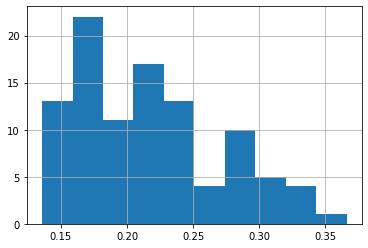

In [8]:
per_pop_LA.hist()

In [9]:
per_pop_LA.mean(), metapop_LA

(0.21626053276394586, 0.21626053276394575)

In [10]:
la_df = pd.DataFrame(per_pop_LA, columns=['final_LA'])

la_df

,final_LA
1,0.326229
2,0.282393
3,0.189010
4,0.304737
5,0.228846
...,...
96,0.174475
97,0.193478
98,0.250054
99,0.317172


In [11]:
# save
file = f'{tutorial_dir}/pop_level_LA.txt'
la_df.to_csv(file, sep='\t', index=True, header=True)

file

'/home/b.lind/offsets/run_20220919_tutorial/pop_level_LA.txt'

In [12]:
pd.read_table(file, index_col=0)

,final_LA
1,0.326229
2,0.282393
3,0.189010
4,0.304737
5,0.228846
...,...
96,0.174475
97,0.193478
98,0.250054
99,0.317172


In [13]:
# variation in LA
np.var(la_df.final_LA)

0.0029420508138557895

In [14]:
# coefficient of variation in LA
np.sqrt(np.var(la_df.final_LA)) / la_df.final_LA.mean()

0.2508117140425896

In [15]:
# also coefficient of variation in LA
la_df.final_LA.std() / la_df.final_LA.mean()

0.25207525712278245